In [1]:
from os.path import splitext
from os import listdir
from os.path import join
import numpy as np
from glob import glob
import torch
from torch.utils.data import Dataset
import logging
from PIL import Image
from torchvision import transforms, utils
import matplotlib.pyplot as plt

In [2]:
class experimental_dataset(Dataset):

    def __init__(self, data, transform):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data.shape[0])

    def __getitem__(self, idx):
        item = self.data[idx]
        item = self.transform(item)
        return item

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

x = torch.rand(4, 1, 2, 2)
print(x)
print()
print()
print()


dataset = experimental_dataset(x,transform)

for item in dataset:
    print(item)

tensor([[[[0.2224, 0.0329],
          [0.1750, 0.7428]]],


        [[[0.9870, 0.3054],
          [0.8294, 0.4144]]],


        [[[0.9574, 0.4120],
          [0.6144, 0.6533]]],


        [[[0.9849, 0.1233],
          [0.7476, 0.5256]]]])



tensor([[[0.2196, 0.0314],
         [0.1725, 0.7412]]])
tensor([[[0.3020, 0.9843],
         [0.4118, 0.8275]]])
tensor([[[0.4118, 0.9569],
         [0.6510, 0.6118]]])
tensor([[[0.1216, 0.9843],
         [0.5255, 0.7451]]])


In [3]:
class MyDataset(Dataset):
    def __init__(self, image_paths, target_paths, train=True):
        self.image_paths = image_paths
        self.target_paths = target_paths
        self.files = os.listdir(self.image_paths)
        self.lables = os.listdir(self.target_paths)

    def transform(self, image, mask):
        # Resize
        resize = transforms.Resize(size=(520, 520))
        image = resize(image)
        mask = resize(mask)

        # Random crop
        i, j, h, w = transforms.RandomCrop.get_params(
            image, output_size=(512, 512))
        image = TF.crop(image, i, j, h, w)
        mask = TF.crop(mask, i, j, h, w)

        # Random horizontal flipping
        if random.random() > 0.5:
            image = TF.hflip(image)
            mask = TF.hflip(mask)

        # Random vertical flipping
        if random.random() > 0.5:
            image = TF.vflip(image)
            mask = TF.vflip(mask)

        # Transform to tensor
        image = TF.to_tensor(image)
        mask = TF.to_tensor(mask)
        return image, mask
    def __len__(self):
       
        return len(self.image_paths)
    def __getitem__(self,idx):
        img_name = self.files[idx]
        label_name = self.lables[idx]
        image = Image.open(os.path.join(self.image_paths,img_name))
        mask = Image.open(os.path.join(self.target_paths,label_name))
        x, y = self.transform(image, mask)
        return x, y

In [4]:
import os
print(os.getcwd() + "\n")
print(os.getcwd() + "\n")





E:\codes\Daily_useful\DataAugmentation2D_pytorch

E:\codes\Daily_useful\DataAugmentation2D_pytorch



In [5]:
import torchvision.transforms.functional as TF
def transform( CT, PET):
    #print('CCCTTCTTCTTTTTTT',CT.shape,CT.dtype)

    if torch.rand(1) < 0.5:
        CT = TF.hflip(CT)
        PET = TF.hflip(PET)

    if torch.rand(1) < 0.5:
        CT = TF.vflip(CT)
        PET = TF.vflip(PET)

    if torch.rand(1) < 0.5:
        randi = torch.randint(0,360,(1,)).item()
        CT = TF.rotate(CT, randi)
        PET = TF.rotate(PET, randi)

    return CT, PET

## Augmentation test Lenna


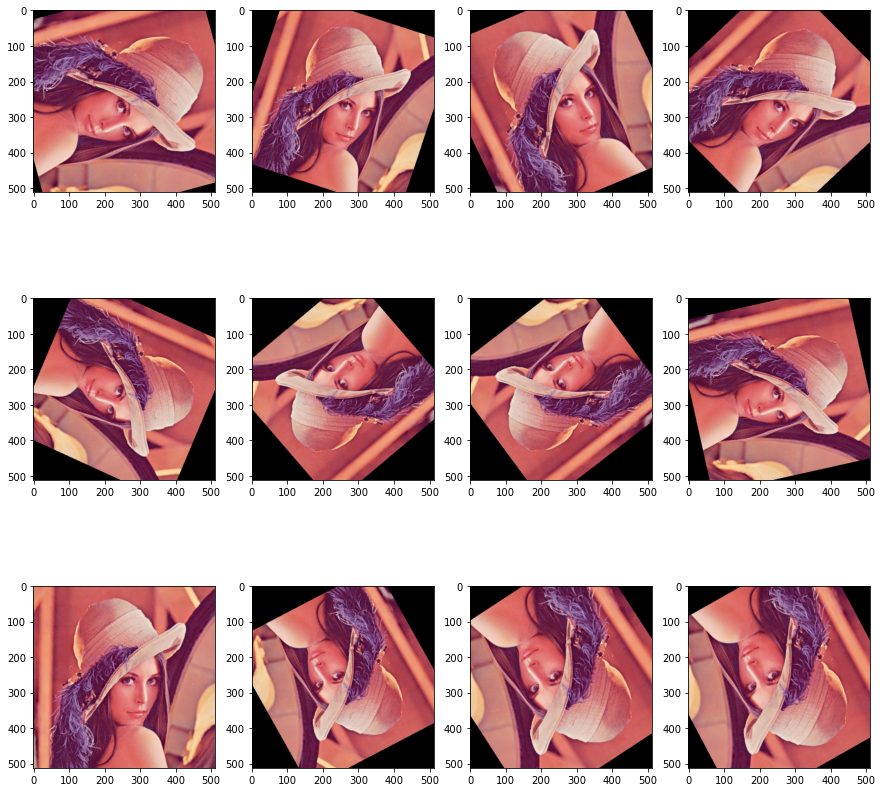

In [6]:
import torchvision.transforms.functional as TF
import torchvision.transforms as tt

def transform( img):
    #print('CCCTTCTTCTTTTTTT',CT.shape,CT.dtype)

    if torch.rand(1) < 0.5:
        img = TF.hflip(img)
        #PET = TF.hflip(PET)

    if torch.rand(1) < 0.5:
        img = TF.vflip(img)
        #PET = TF.vflip(PET)

    if torch.rand(1) < 0.8:
        randi = torch.randint(0,360,(1,)).item()
        img = TF.rotate(img, randi)
        #PET = TF.rotate(PET, randi)

    return img


def transform2(img):
    
    i,j,h, w = transforms.RandomCrop.get_params(img, output_size=(300, 300)) #(0, 0, 512, 512)
    img = TF.crop(img, i,j,h, w) 
    img = TF.adjust_brightness(img, 1 + 0.5*(2*torch.rand(1)-1) )  
    
    return img


def transform3(img):

    affine_params = tt.RandomAffine(180).get_params((-90, 90), (1, 1), (0.8, 1.2), (-45, 45),(512,512))
    img = TF.affine(img, *affine_params)

    return img
#STATIC get_params(degrees: List[float], translate: Union[List[float], NoneType], scale_ranges: Union[List[float],
#NoneType], shears: Union[List[float], NoneType], img_size: List[int]) → Tuple[float, Tuple[int, int], float,
# Tuple[float, float]]


def transform4(img):
    #tt.RandomResizedCrop(size, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=<InterpolationMode.BILINEAR: 'bilinear'>)
    affine_params = tt.RandomAffine(0).get_params((0, 0), (0.05, 0.05), (0.85, 1.15), (-5, 5),img_size=(512,512))
    affine_params = tt.RandomAffine(0).get_params((0, 0), (0.05, 0.05), (1.0, 1.0), (0, 0),img_size=(512,512))
    affine_params = tt.RandomAffine(0).get_params((-180, 180), (0.0, 0.0), (0.85, 1.15), (-3, 3),img_size=(0,0))
    img = TF.affine(img, *affine_params)
    return img
# torchvision.transforms.RandomAffine(degrees, translate=None, scale=None, shear=None, 
# interpolation=<InterpolationMode.NEAREST: 'nearest'>, fill=0, fillcolor=None, resample=None)



x= Image.open('Lenna.png')

columns = 4
rows = 3
fig3=plt.figure(figsize=(15, 15))

for i in range(1, columns*rows +1):
    img = transform4(x)
    fig3.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [7]:
affine_params = tt.RandomAffine(180).get_params((-90, 90), (0, 0), (0.5, 2), (0, 0),img_size=(512,512))
affine_params

(-32.8304328918457, (0, 0), 1.7121020555496216, (0.0, 0.0))

In [8]:
tt.RandomAffine(30)

RandomAffine(degrees=[-30.0, 30.0])

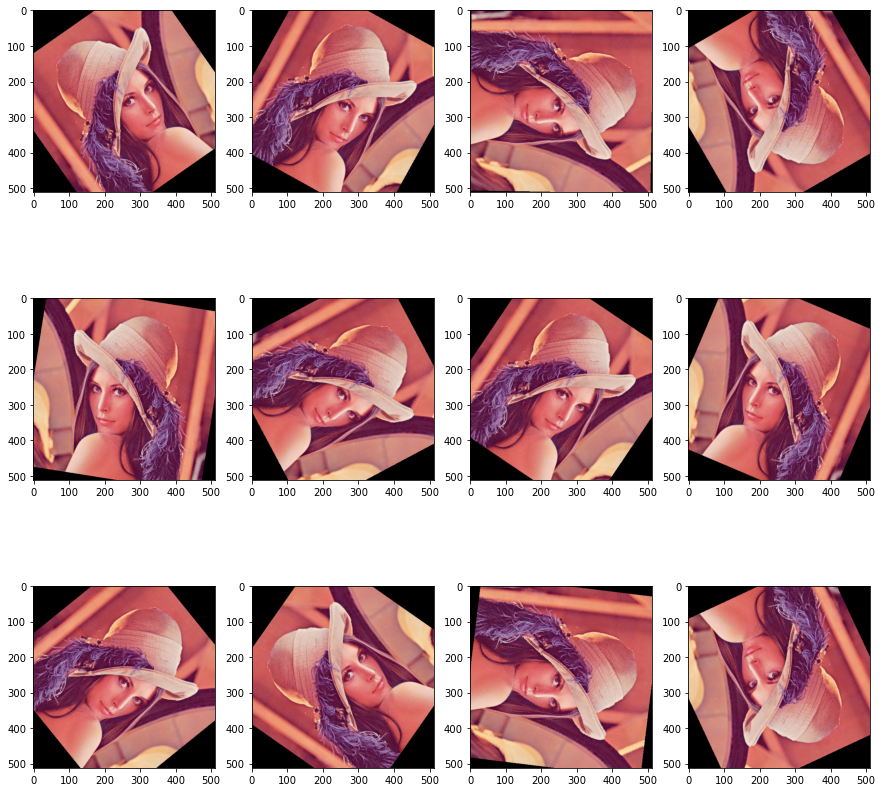

In [9]:
x= Image.open('Lenna.png')
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3
for i in range(1, columns*rows +1):
    img = transform(x)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()


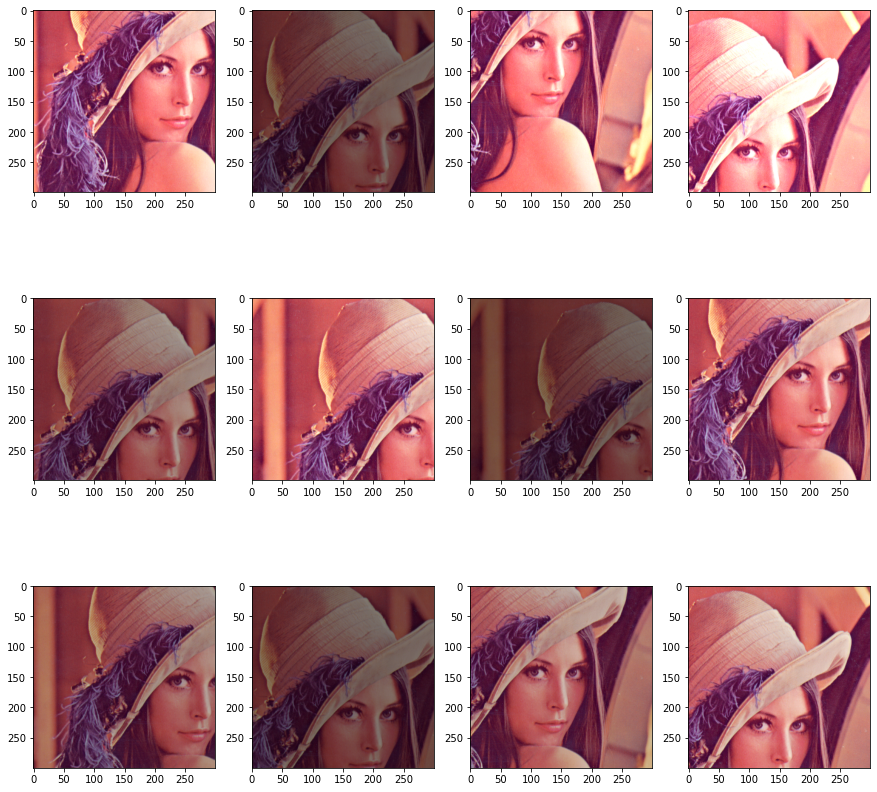

In [10]:

fig2=plt.figure(figsize=(15, 15))
for i in range(1, columns*rows +1):
    img = transform2(x)
    fig2.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

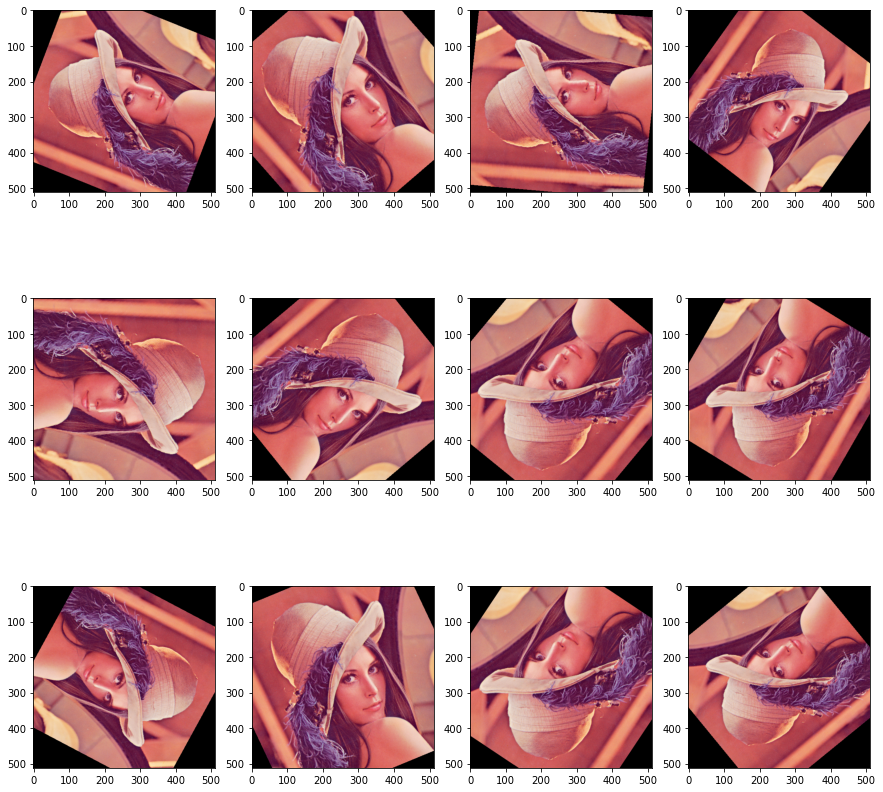

In [11]:
fig3=plt.figure(figsize=(15, 15))
for i in range(1, columns*rows +1):
    img = transform4(x)
    fig3.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [12]:
TF.affine        
    # random affine transform
        if np.random.rand() < self.p_random_affine:
            affine_params = T.RandomAffine(180).get_params((-90, 90), (1, 1), (2, 2), (-45, 45), self.crop)
            image, mask = F.affine(image, *affine_params), F.affine(mask, *affine_params)

IndentationError: unexpected indent (Temp/ipykernel_37736/3475124724.py, line 3)

In [ ]:
plt.plot(x.histogram())
x.

In [ ]:
# lets make Lenna darker
#lena = x.pow(3)
plt.imshow(x)
#x.max()
xx = np.linspace(0,1,100)
#xx.max()
#plt.plot(x)
x.histogram()

In [ ]:
tt.RandomAffine(10, translate=None, scale=None,shear=None, )

In [ ]:
1 + 0.2*torch.rand(1)

In [ ]:
transforms.RandomCrop.get_params(img, output_size=(200, 200))

In [ ]:
#x = torch.rand( 1 , 2 , 2 )
#x = TF.hflip(x)
#for i in range(8):
    #z[i,:,:] = transform(x)
x.dtype

In [ ]:
TF.rotate(x,180)

In [ ]:
randi = torch.randint(0,360,(1,)).item()
randi

In [ ]:
np.random.randint(0,360,(1,))

In [ ]:
i,j,h, w = transforms.RandomCrop.get_params(x, output_size=(400, 400))
i,j,h, w

In [ ]:
0.1*(2*torch.rand(1)-1)

In [ ]:
torch.randint(100,(1,)).item()

In [ ]:
x , y = torch.rand((100,100)), torch.rand((100,100))
loss = torch.mean(x*(x-y)**2)
loss

In [ ]:
x , y = torch.rand((10,1,100,100)), torch.rand((10,1,100,100))
#torch.sqrt(x)
loss3 = torch.mean(x*(x - y)**2)
loss3

In [ ]:
x[:,0,:,:].shape

In [ ]:

for i in range(x.shape[0]):
    (x*(x - y)**2)

In [ ]:

dict_parm = {"Weights":(1,1,1),"batch_size":16,"LR":0.001}
W1, W2, W3, batch_size = dict_parm["Weights"],dict_parm["batch_size"]

In [ ]:
weights_dict = {"mse_loss":1.0 ,  "Pet*mse_loss": 0.0, 'ssim_loss': 0.0}
weights = (weights_dict["mse_loss"], weights_dict["Pet*mse_loss"],weights_dict['ssim_loss'])
weights

In [ ]:
torch.Tensor(weights)

In [ ]:
def a(a):
    return a,a+1,a+2
b,c = a(13)
b,c

In [ ]:
from torch import optim
import torch
import torch.nn as nn
# With square kernels and equal stride
m = nn.ConvTranspose2d(1, 64, 3, stride=2)
input = torch.randn(4, 1, 512, 512)
output = m(input)

downsample = nn.Conv2d(1, 64, 3, stride=2, padding=1)
upsample = nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1)
upsample = nn.ConvTranspose2d(64, 32, 2, stride=2, padding=0)
upsample = nn.ConvTranspose2d(64, 32, 2, stride=2, padding=0)
h = downsample(input)
h.size()
#torch.Size([1, 16, 6, 6])
#output = upsample(h, output_size=input.size())
output = upsample(h)
output.size()
#torch.Size([1, 16, 12, 12])

cat = torch.cat((output, output), dim=1)
cat.shape

In [ ]:
class FCN_4s(nn.Module):
    def __init__(self, input_channels, output_channels, bilinear=True):
        super(FCN_4s, self).__init__()

        # Downsampling
        self.d_conv1 = nn.Conv2d(input_channels, 64, kernel_size=3, padding=1)
        self.d_relu1 = nn.LeakyReLU()
        self.d_pool1 = nn.MaxPool2d(2)

        self.d_conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.d_relu2 = nn.LeakyReLU()
        self.d_pool2 =nn.MaxPool2d(2)

        self.d_conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.d_relu3 = nn.LeakyReLU()
        self.d_pool3 =nn.MaxPool2d(2)

        self.d_conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.d_relu4 = nn.LeakyReLU()
        self.d_pool4 =nn.MaxPool2d(2)

        self.d_conv5 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.d_relu5 = nn.LeakyReLU()
        self.d_pool5 =nn.MaxPool2d(2)

        self.d_conv6 = nn.Conv2d(512, 4096, kernel_size=7, padding=3)
        self.d_relu6 = nn.LeakyReLU()

        self.d_conv7 = nn.Conv2d(4096, 2048, kernel_size=1, padding=0)
        self.d_relu7 = nn.LeakyReLU()

        self.d_conv8 = nn.Conv2d(2048, 512, kernel_size=1, padding=0)
        self.d_relu8 = nn.LeakyReLU()

        # Upsampling
        self.u_conv1 = nn.Upsample(scale_factor=2, mode='bilinear')
        #self.u_conv1 = nn.ConvTranspose2d(1024 , 512, kernel_size=2, stride=2)
        self.u_relu1 = nn.LeakyReLU()
        
        self.u_conv1_ = nn.Conv2d(1024, 512, kernel_size=1, padding=0)
        self.u_relu1_ = nn.LeakyReLU()
        

        self.u_conv2 = nn.Upsample(scale_factor=2, mode='bilinear')
        #self.u_conv2 = nn.ConvTranspose2d(1024 , 512, kernel_size=2, stride=2)
        self.u_relu2 = nn.LeakyReLU()
        
        self.u_conv3 = nn.Upsample(scale_factor=2, mode='bilinear')
        #self.u_conv2_ = nn.Conv2d(512, 256, kernel_size=3, padding=1)
        self.u_relu2_ = nn.LeakyReLU()
        
        

        #self.u_conv3 = nn.Upsample(scale_factor=2, mode='bilinear')
        self.u_conv3 = nn.ConvTranspose2d(512 , 512, kernel_size=2, stride=2)
        self.u_relu3 = nn.LeakyReLU()

        self.u_conv4 = nn.ConvTranspose2d(512+256 , 256, kernel_size=2, stride=2)
        self.u_relu4 = nn.LeakyReLU()

        self.u_conv5 = nn.ConvTranspose2d(1024 , 512, kernel_size=2, stride=2)
        self.u_relu5 = nn.LeakyReLU()

    def forward(self, x):#[16,1,512,512]  (x1) (x2) (x3) (x4)

        x1 = self.d_conv1(x)
        x1 = self.d_relu1(x1)
        x1 = self.d_pool1(x1)

        x2 =self.d_conv2(x1)
        x2 =self.d_relu2(x2)
        x2 =self.d_pool2(x2) 

        x3 =self.d_conv3(x2)
        x3 =self.d_relu3(x3) 
        x3 =self.d_pool3(x3)

        x4 = self.d_conv4(x3) 
        x4 = self.d_relu4(x4) 
        x4 = self.d_pool4(x4) 

        x5 = self.d_conv5(x4) 
        x5 = self.d_relu5(x5) 
        x5 = self.d_pool5(x5) 

        x6 = self.d_conv6(x5) 
        x6 = self.d_relu6(x6) 

        x7 = self.d_conv7(x6) 
        x7 = self.d_relu7(x7) 

        x8 = self.d_conv8(x7) 
        x8 = self.d_relu8(x8) 

        # Upsampling
        print('x1:',x1.shape)
        print('x2:',x2.shape)
        print('x3:',x3.shape)
        print('x4:',x4.shape)
        print('x5:',x5.shape)
        print('x6:',x5.shape)
        
        x_u1 = self.u_conv1(torch.cat((x5, x8), dim=1)) 
        x_u1 = self.u_relu1(x_u1)
        print('x_u1:',x_u1.shape)
        
        x_u1_ = self.u_conv1_(x_u1)
        x_u1_ = self.u_relu1_(x_u1_)
        print('x_u1_:',x_u1_.shape)

        x_u2 = self.u_conv2(torch.cat((x4, x_u1_), dim=1)) 
        x_u2 = self.u_relu2(x_u2) 
        print('x_u2:',x_u2.shape)
        
        x_u2_c = self.u_conv2_(x_u2) 
        x_u2_c = self.u_relu2_(x_u2_c) 
        print('x_u2_:',x_u2.shape)
        
        x_u3 = self.u_conv3(torch.cat((x3, x_u2_c), dim=1)) 
        x_u3 = self.u_relu3(x_u3)
        
        x_u3_c = self.u_conv3_c(torch.cat((x3, x_u3), dim=1)) 
        x_u3_c = self.u_relu3_c(x_u3_c) 
        
        
        x_u4 = self.u_conv4(torch.cat((x3, x_u2_c), dim=1)) 
        x_u4 = self.u_relu4(x_u4)
        
        x_u3_c = self.u_conv3_c(torch.cat((x3, x_u3), dim=1)) 
        x_u3_c = self.u_relu3_c(x_u3_c) 

        x1 = self.u_conv4(x2) 
        x1 = self.u_relu4(x2) 

        x1 = self.u_conv5(x2) 
        x1 = self.u_relu5(x2) 
        
        return logits
    
net = FCN_4s(1, 1)
optimizer = optim.RMSprop(net.parameters(), lr=0.001, weight_decay=1e-8, momentum=0.9)
input = torch.randn(4, 1, 512, 512)
net.train()
output = net(input)

In [ ]:
class FCN_4s(nn.Module):
    def __init__(self, input_channels, output_channels, bilinear=True):
        super(FCN_4s, self).__init__()

        # Downsampling
        self.d_conv1 = nn.Conv2d(input_channels, 64, kernel_size=3, padding=1)
        self.d_relu1 = nn.LeakyReLU()

        self.d_conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.d_relu2 = nn.LeakyReLU()
        self.d_pool2 =nn.MaxPool2d(2)    #256

        self.d_conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.d_relu3 = nn.LeakyReLU()
        self.d_pool3 =nn.MaxPool2d(2)    #128

        self.d_conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.d_relu4 = nn.LeakyReLU()
        self.d_pool4 =nn.MaxPool2d(2)    #64

        self.d_conv5 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.d_relu5 = nn.LeakyReLU()
        self.d_pool5 =nn.MaxPool2d(2)    #32

        self.d_conv6 = nn.Conv2d(512, 4096, kernel_size=7, padding=3)
        self.d_relu6 = nn.LeakyReLU()
        self.d_pool6 =nn.MaxPool2d(2)    #16

        self.d_conv7 = nn.Conv2d(4096, 2048, kernel_size=1, padding=0)
        self.d_relu7 = nn.LeakyReLU()    #16

        self.d_conv8 = nn.Conv2d(2048, 512, kernel_size=1, padding=0)
        self.d_relu8 = nn.LeakyReLU()    #16

        # Upsampling
        self.up_1 = nn.Upsample(scale_factor=2, mode='bilinear')
        self.u_conv1 = nn.Conv2d(1024, 512, kernel_size=3, padding=1)
        self.u_relu1 = nn.LeakyReLU()
        
        self.up_2 = nn.Upsample(scale_factor=2, mode='bilinear')
        self.u_conv2 = nn.Conv2d(1024, 512, kernel_size=3, padding=1)
        self.u_relu2 = nn.LeakyReLU()
        
        self.up_3 = nn.Upsample(scale_factor=2, mode='bilinear')
        self.u_conv3 = nn.Conv2d(512+256, 512, kernel_size=3, padding=1)
        self.u_relu3 = nn.LeakyReLU()
        
        self.up_4 = nn.Upsample(scale_factor=4, mode='bilinear')
        self.final = nn.Conv2d(512, 1, kernel_size=1, padding=0)

    def forward(self, x):#[16,1,512,512]  (x1) (x2) (x3) (x4)

        x1 = self.d_conv1(x)
        x1 = self.d_relu1(x1)

        x2 =self.d_conv2(x1)
        x2 =self.d_relu2(x2)
        x2 =self.d_pool2(x2)  #[4, 512, 256, 256]

        x3 =self.d_conv3(x2)
        x3 =self.d_relu3(x3) 
        x3 =self.d_pool3(x3)  #[4, 512, 128, 128]

        x4 = self.d_conv4(x3) 
        x4 = self.d_relu4(x4) 
        x4 = self.d_pool4(x4) #[4, 512, 64, 64]

        x5 = self.d_conv5(x4) 
        x5 = self.d_relu5(x5) 
        x5 = self.d_pool5(x5) #[4, 512, 32, 32]

        x6 = self.d_conv6(x5) 
        x6 = self.d_relu6(x6) 
        x6 = self.d_pool6(x6)  #[4, 512, 16, 16]

        x7 = self.d_conv7(x6) 
        x7 = self.d_relu7(x7) 

        x8 = self.d_conv8(x7) 
        x8 = self.d_relu8(x8)  #[4, 512, 16, 16]

        # Upsampling
        print('x1:',x1.shape)
        print('x2:',x2.shape)
        print('x3:',x3.shape)
        print('x4:',x4.shape)
        print('x5:',x5.shape)
        print('x6:',x6.shape)
        print('x8:',x8.shape)
        
        x_u1 = self.up_1(x8) #[4, 512, 32, 32]     
        x_uc1 = self.u_conv1(torch.cat((x5, x_u1), dim=1))
        x_ur1 = self.u_relu1(x_uc1) #[4, 512, 32, 32]
        #print('x_ur1:',x_ur1.shape)
        
        x_u2 = self.up_2(x_ur1)  #[4, x, 64, 64]   
        x_uc2 = self.u_conv2(torch.cat((x4, x_u2), dim=1))
        x_ur2 = self.u_relu2(x_uc2) #[4, 512, 64, 64]
        #print('x_ur2:',x_u2.shape,x_uc2.shape,x_ur2.shape,torch.cat((x4, x_u2), dim=1).shape)
        
        x_u3 = self.up_3(x_ur2)  #[4, x, 128, 128]   
        x_uc3 = self.u_conv3(torch.cat((x3, x_u3), dim=1))
        x_ur3 = self.u_relu3(x_uc3) #[4, 512, 128, 128]
        print('x_ur3:',x_ur3.shape)
        
        x_ur4 = self.up_4(x_ur3)
        final = self.final(x_ur4)
        
        return final
    
net = FCN_4s(1, 1)
optimizer = optim.RMSprop(net.parameters(), lr=0.001, weight_decay=1e-8, momentum=0.9)
input = torch.randn(4, 1, 384, 384)
net.train()
output = net(input)

output.shape

In [ ]:
16-
14-28-56-112-224-448
13-26-52-104-208-416
12-24-48-96-192-384


In [ ]:
class FCN_4s(nn.Module):
    def __init__(self, input_channels, output_channels, bilinear=True):
        super(FCN_4s, self).__init__()

        # Downsampling
        self.d_conv1 = nn.Conv2d(input_channels, 64, kernel_size=3, padding=1)
        self.d_relu1 = nn.LeakyReLU()

        self.d_conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.d_relu2 = nn.LeakyReLU()
        self.d_pool2 =nn.MaxPool2d(2)    #256

        self.d_conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.d_relu3 = nn.LeakyReLU()
        self.d_pool3 =nn.MaxPool2d(2)    #128

        self.d_conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.d_relu4 = nn.LeakyReLU()
        self.d_pool4 =nn.MaxPool2d(2)    #64

        self.d_conv5 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.d_relu5 = nn.LeakyReLU()
        self.d_pool5 =nn.MaxPool2d(2)    #32

        self.d_conv6 = nn.Conv2d(512, 4096, kernel_size=7, padding=3)
        self.d_relu6 = nn.LeakyReLU()
        self.d_pool6 =nn.MaxPool2d(2)    #16

        self.d_conv7 = nn.Conv2d(4096, 2048, kernel_size=1, padding=0)
        self.d_relu7 = nn.LeakyReLU()    #16

        self.d_conv8 = nn.Conv2d(2048, 512, kernel_size=1, padding=0)
        self.d_relu8 = nn.LeakyReLU()    #16

        # Upsampling
        self.up_1 = nn.Upsample(scale_factor=2, mode='bilinear')
        self.u_conv1 = nn.Conv2d(1024, 512, kernel_size=3, padding=1)
        self.u_relu1 = nn.LeakyReLU()
        
        self.up_2 = nn.Upsample(scale_factor=2, mode='bilinear')
        self.u_conv2 = nn.Conv2d(1024, 512, kernel_size=3, padding=1)
        self.u_relu2 = nn.LeakyReLU()
        
        self.up_3 = nn.Upsample(scale_factor=2, mode='bilinear')
        self.u_conv3 = nn.Conv2d(512+256, 512, kernel_size=3, padding=1)
        self.u_relu3 = nn.LeakyReLU()
        
        self.up_4 = nn.Upsample(scale_factor=4, mode='bilinear')
        self.final = nn.Conv2d(512, 1, kernel_size=1, padding=0)

    def forward(self, x):#[16,1,512,512]  (x1) (x2) (x3) (x4)

        x1 = self.d_conv1(x)
        x1 = self.d_relu1(x1)

        x2 =self.d_conv2(x1)
        x2 =self.d_relu2(x2)
        x2 =self.d_pool2(x2)  #[4, 512, 256, 256]

        x3 =self.d_conv3(x2)
        x3 =self.d_relu3(x3) 
        x3 =self.d_pool3(x3)  #[4, 512, 128, 128]

        x4 = self.d_conv4(x3) 
        x4 = self.d_relu4(x4) 
        x4 = self.d_pool4(x4) #[4, 512, 64, 64]

        x5 = self.d_conv5(x4) 
        x5 = self.d_relu5(x5) 
        x5 = self.d_pool5(x5) #[4, 512, 32, 32]

        x6 = self.d_conv6(x5) 
        x6 = self.d_relu6(x6) 
        x6 = self.d_pool6(x6)  #[4, 512, 16, 16]

        x7 = self.d_conv7(x6) 
        x7 = self.d_relu7(x7) 

        x8 = self.d_conv8(x7) 
        x8 = self.d_relu8(x8)  #[4, 512, 16, 16]

        # Upsampling  
        x = self.up_1(x8) #[4, 512, 32, 32]     
        x = self.u_conv1(torch.cat((x5, x), dim=1))
        x = self.u_relu1(x) #[4, 512, 32, 32]
        
        x = self.up_2(x)  #[4, x, 64, 64]   
        x = self.u_conv2(torch.cat((x4, x), dim=1))
        x = self.u_relu2(x) #[4, 512, 64, 64]
        
        x = self.up_3(x)  #[4, x, 128, 128]   
        x = self.u_conv3(torch.cat((x3, x), dim=1))
        x = self.u_relu3(x) #[4, 512, 128, 128]
        
        x = self.up_4(x)
        x = self.final(x)
        
        return x
    
net = FCN_4s(1, 1)
optimizer = optim.RMSprop(net.parameters(), lr=0.001, weight_decay=1e-8, momentum=0.9)
input = torch.randn(4, 1, 384, 384)
net.train()
output = net(input)

output.shape

In [ ]:
class FCN_4s(nn.Module):
    def __init__(self, input_channels, output_channels, bilinear=True):
        super(FCN_4s, self).__init__()

        # Downsampling
        self.d_conv1 = nn.Conv2d(input_channels, 64, kernel_size=3, padding=1)
        self.d_bn1 = nn.BatchNorm2d(64)
        self.d_relu1 = nn.LeakyReLU()

        self.d_conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.d_bn2 = nn.BatchNorm2d(128)
        self.d_relu2 = nn.LeakyReLU()
        self.d_pool2 =nn.MaxPool2d(2)    #256

        self.d_conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.d_bn3 = nn.BatchNorm2d(256)
        self.d_relu3 = nn.LeakyReLU()
        self.d_pool3 =nn.MaxPool2d(2)    #128

        self.d_conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.d_bn4 = nn.BatchNorm2d(512)
        self.d_relu4 = nn.LeakyReLU()
        self.d_pool4 =nn.MaxPool2d(2)    #64

        self.d_conv5 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.d_bn5 = nn.BatchNorm2d(512)
        self.d_relu5 = nn.LeakyReLU()
        self.d_pool5 =nn.MaxPool2d(2)    #32

        self.d_conv6 = nn.Conv2d(512, 512, kernel_size=7, padding=3)
        self.d_bn6 = nn.BatchNorm2d(512)
        self.d_relu6 = nn.LeakyReLU()
        self.d_pool6 =nn.MaxPool2d(2)    #16

        self.d_conv7 = nn.Conv2d(512, 512, kernel_size=1, padding=0)
        self.d_bn7 = nn.BatchNorm2d(512)
        self.d_relu7 = nn.LeakyReLU()    #16

        self.d_conv8 = nn.Conv2d(512, 512, kernel_size=1, padding=0)
        self.d_bn8 = nn.BatchNorm2d(512)
        self.d_relu8 = nn.LeakyReLU()    #16

        # Upsampling
        self.up_1 = nn.Upsample(scale_factor=2, mode='bilinear')
        self.u_conv1 = nn.Conv2d(1024, 512, kernel_size=3, padding=1)
        self.u_bn1 = nn.BatchNorm2d(512)
        self.u_relu1 = nn.LeakyReLU()
        
        self.up_2 = nn.Upsample(scale_factor=2, mode='bilinear')
        self.u_conv2 = nn.Conv2d(1024, 512, kernel_size=3, padding=1)
        self.u_bn2 = nn.BatchNorm2d(512)
        self.u_relu2 = nn.LeakyReLU()
        
        self.up_3 = nn.Upsample(scale_factor=2, mode='bilinear')
        self.u_conv3 = nn.Conv2d(512+256, 256, kernel_size=3, padding=1)
        self.u_bn3 = nn.BatchNorm2d(256)
        self.u_relu3 = nn.LeakyReLU()
        
        self.up_4 = nn.Upsample(scale_factor=4, mode='bilinear')
        self.final = nn.Conv2d(256, 1, kernel_size=1, padding=0)

    def forward(self, x):#[16,1,512,512]  (x1) (x2) (x3) (x4)

        x1 = self.d_conv1(x)
        x1 = self.d_bn1(x1)
        x1 = self.d_relu1(x1)

        x2 =self.d_conv2(x1)
        x2 = self.d_bn2(x2)
        x2 =self.d_relu2(x2)
        x2 =self.d_pool2(x2)  #[4, x, 256, 256]

        x3 =self.d_conv3(x2)
        x3 = self.d_bn3(x3)
        x3 =self.d_relu3(x3) 
        x3 =self.d_pool3(x3)  #[4, x, 128, 128]

        x4 = self.d_conv4(x3) 
        x4 = self.d_bn4(x4)
        x4 = self.d_relu4(x4) 
        x4 = self.d_pool4(x4) #[4, x, 64, 64]

        x5 = self.d_conv5(x4) 
        x5 = self.d_bn5(x5)
        x5 = self.d_relu5(x5) 
        x5 = self.d_pool5(x5) #[4, x, 32, 32]

        x6 = self.d_conv6(x5) 
        x6 = self.d_bn6(x6)
        x6 = self.d_relu6(x6) 
        x6 = self.d_pool6(x6)  #[4, x, 16, 16]

        x6 = self.d_conv7(x6)
        x6 = self.d_bn7(x6)
        x6 = self.d_relu7(x6) 

        x6 = self.d_conv8(x6) 
        x6 = self.d_bn8(x6)
        x6 = self.d_relu8(x6)  #[4, x, 16, 16]

        # Upsampling  
        x = self.up_1(x6) #[4, x, 32, 32]     
        x = self.u_conv1(torch.cat((x5, x), dim=1))
        x = self.u_bn1(x)
        x = self.u_relu1(x) #[4, x, 32, 32]
        
        x = self.up_2(x)  #[4, x, 64, 64]   
        x = self.u_conv2(torch.cat((x4, x), dim=1))
        x = self.u_bn2(x)
        x = self.u_relu2(x) #[4, x, 64, 64]
        
        x = self.up_3(x)  #[4, x, 128, 128]   
        x = self.u_conv3(torch.cat((x3, x), dim=1))
        x = self.u_bn3(x)
        x = self.u_relu3(x) #[4, x, 128, 128]
        
        x = self.up_4(x)
        x = self.final(x)
        
        return x
    
net = FCN_4s(1, 1)
optimizer = optim.RMSprop(net.parameters(), lr=0.001, weight_decay=1e-8, momentum=0.9)
input = torch.randn(4, 1, 384, 384)
net.train()
output = net(input)

output.shape    

In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
import cv2
 
 
class GaussianBlurConv(nn.Module):
    def __init__(self, channels=3):
        super(GaussianBlurConv, self).__init__()
        self.channels = channels
        kernel = [[0.00078633, 0.00655965, 0.01330373, 0.00655965, 0.00078633],
                  [0.00655965, 0.05472157, 0.11098164, 0.05472157, 0.00655965],
                  [0.01330373, 0.11098164, 0.22508352, 0.11098164, 0.01330373],
                  [0.00655965, 0.05472157, 0.11098164, 0.05472157, 0.00655965],
                  [0.00078633, 0.00655965, 0.01330373, 0.00655965, 0.00078633]]
        kernel = [[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
                [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
               [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
               [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
               [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]]
        kernel = [[1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [1.76900911e-03, 2.15509428e-02, 9.65846250e-02, 1.59241126e-01,
        9.65846250e-02, 2.15509428e-02, 1.76900911e-03],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05]]
        kernel = torch.FloatTensor(kernel).unsqueeze(0).unsqueeze(0)
        kernel = np.repeat(kernel, self.channels, axis=0)
        self.weight = nn.Parameter(data=kernel, requires_grad=False)
 
    def __call__(self, x):
        x = F.conv2d(x.unsqueeze(0), self.weight, padding=2, groups=self.channels)
        return x
 
#input_x = cv2.imread("kodim04.png")
input_x = np.array(Image.open('Lenna.png'))
plt.imshow(input_x)
plt.show()
input_x = Variable(torch.from_numpy(input_x.astype(np.float32))).permute(2, 0, 1)
gaussian_conv = GaussianBlurConv()
out_x = gaussian_conv(input_x)
out_x = out_x.squeeze(0).permute(1, 2, 0).data.numpy().astype(np.uint8)
plt.imshow(out_x)


In [ ]:
def GaussianTorch(x):     
    kernel = [[0.00078633, 0.00655965, 0.01330373, 0.00655965, 0.00078633],
                  [0.00655965, 0.05472157, 0.11098164, 0.05472157, 0.00655965],
                  [0.01330373, 0.11098164, 0.22508352, 0.11098164, 0.01330373],
                  [0.00655965, 0.05472157, 0.11098164, 0.05472157, 0.00655965],
                  [0.00078633, 0.00655965, 0.01330373, 0.00655965, 0.00078633]]
    kernel = torch.FloatTensor(kernel).unsqueeze(0).unsqueeze(0)
    print(kernel.shape)
    kernel = np.repeat(kernel, self.channels, axis=0)
    self.weight = nn.Parameter(data=kernel, requires_grad=False)
 
    def __call__(self, x):
        x = F.conv2d(x.unsqueeze(0), self.weight, padding=2, groups=self.channels)
        return x

In [ ]:
kernel = [[0.00078633, 0.00655965, 0.01330373, 0.00655965, 0.00078633],
              [0.00655965, 0.05472157, 0.11098164, 0.05472157, 0.00655965],
              [0.01330373, 0.11098164, 0.22508352, 0.11098164, 0.01330373],
              [0.00655965, 0.05472157, 0.11098164, 0.05472157, 0.00655965],
              [0.00078633, 0.00655965, 0.01330373, 0.00655965, 0.00078633]]
kernel = torch.FloatTensor(kernel).unsqueeze(0).unsqueeze(0)
print(kernel.shape)

In [ ]:
kernel = [[0.00078633, 0.00655965, 0.01330373, 0.00655965, 0.00078633],
              [0.00655965, 0.05472157, 0.11098164, 0.05472157, 0.00655965],
              [0.01330373, 0.11098164, 0.22508352, 0.11098164, 0.01330373],
              [0.00655965, 0.05472157, 0.11098164, 0.05472157, 0.00655965],
              [0.00078633, 0.00655965, 0.01330373, 0.00655965, 0.00078633]]
kernel = torch.FloatTensor(kernel).unsqueeze(0)
print(kernel.shape)
kernel = np.repeat(kernel, 3, axis=0)
print(kernel.shape)
weight = nn.Parameter(data=kernel, requires_grad=False)

x = F.conv2d(x.unsqueeze(0), self.weight, padding=2, groups=self.channels)

In [ ]:
def GaussianTorch(x):     
    kernel = [[0.00078633, 0.00655965, 0.01330373, 0.00655965, 0.00078633],
                  [0.00655965, 0.05472157, 0.11098164, 0.05472157, 0.00655965],
                  [0.01330373, 0.11098164, 0.22508352, 0.11098164, 0.01330373],
                  [0.00655965, 0.05472157, 0.11098164, 0.05472157, 0.00655965],
                  [0.00078633, 0.00655965, 0.01330373, 0.00655965, 0.00078633]]
    kernel = torch.FloatTensor(kernel).unsqueeze(0).unsqueeze(0)
    print(kernel.shape)
    kernel = np.repeat(kernel, 3, axis=0)
    weight = nn.Parameter(data=kernel, requires_grad=False)
 

    x = F.conv2d(x.unsqueeze(0), weight, padding=2, groups=3)
    return x
    
input_x = np.array(Image.open('Lenna.png'))
input_x = Variable(torch.from_numpy(input_x.astype(np.float32))).permute(2, 0, 1)
print(input_x.shape)
gaussian_conv = GaussianTorch(input_x)
print(gaussian_conv.shape)
plt.imshow(gaussian_conv.squeeze(0).permute(1, 2, 0).data.numpy().astype(np.uint8))

In [ ]:
def GaussianTorch(x):     
    kernel = [[0.00078633, 0.00655965, 0.01330373, 0.00655965, 0.00078633],
                  [0.00655965, 0.05472157, 0.11098164, 0.05472157, 0.00655965],
                  [0.01330373, 0.11098164, 0.22508352, 0.11098164, 0.01330373],
                  [0.00655965, 0.05472157, 0.11098164, 0.05472157, 0.00655965],
                  [0.00078633, 0.00655965, 0.01330373, 0.00655965, 0.00078633]]
    kernel = torch.FloatTensor(kernel).unsqueeze(0)
    print(kernel.shape)
    kernel = np.repeat(kernel, 3, axis=0)
    weight = nn.Parameter(data=kernel, requires_grad=False)
 

    x = F.conv2d(x.unsqueeze(0), weight, padding=2, groups=3)
    return x
    
input_x = np.array(Image.open('Lenna.png'))
input_x = Variable(torch.from_numpy(input_x.astype(np.float32))).permute(2, 0, 1)
gaussian_conv = GaussianTorch(input_x)
plt.imshow(gaussian_conv.squeeze(0).permute(1, 2, 0).data.numpy().astype(np.uint8))

In [ ]:
import numpy as np

def gkern(l=7, sig=1.):
    """\
    creates gaussian kernel with side length l and a sigma of sig
    """

    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))

    return kernel / np.sum(kernel)
a= gkern()
a

In [ ]:
def GaussianTorch(x):     #Applied on [1,h,w]
    kernel = [[0.00078633, 0.00655965, 0.01330373, 0.00655965, 0.00078633],
                  [0.00655965, 0.05472157, 0.11098164, 0.05472157, 0.00655965],
                  [0.01330373, 0.11098164, 0.22508352, 0.11098164, 0.01330373],
                  [0.00655965, 0.05472157, 0.11098164, 0.05472157, 0.00655965],
                  [0.00078633, 0.00655965, 0.01330373, 0.00655965, 0.00078633]]
    kernel = torch.FloatTensor(kernel).unsqueeze(0).unsqueeze(0)
    print(kernel.shape)
    kernel = np.repeat(kernel, 3, axis=0)
    weight = nn.Parameter(data=kernel, requires_grad=False)
 
    x = F.conv2d(x.unsqueeze(0), weight, padding=2, groups=3)
    return x.squeeze(0)
    
input_x = np.array(Image.open('Lenna.png'))
input_x = Variable(torch.from_numpy(input_x.astype(np.float32))).permute(2, 0, 1)
print(input_x.shape)
gaussian_conv = GaussianTorch(input_x)
print(gaussian_conv.shape)
plt.imshow(gaussian_conv.permute(1, 2, 0).data.numpy().astype(np.uint8))

In [ ]:
def GaussianTorch(x, mode=5):     #Applied on [1,h,w]
    if mode == 5:
        kernel = [[0.00078633, 0.00655965, 0.01330373, 0.00655965, 0.00078633],
                      [0.00655965, 0.05472157, 0.11098164, 0.05472157, 0.00655965],
                      [0.01330373, 0.11098164, 0.22508352, 0.11098164, 0.01330373],
                      [0.00655965, 0.05472157, 0.11098164, 0.05472157, 0.00655965],
                      [0.00078633, 0.00655965, 0.01330373, 0.00655965, 0.00078633]]
        padding = 2
        
    elif mode == 7:
        kernel = [[1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
            1.07295826e-03, 2.39409349e-04, 1.96519161e-05],[2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
            1.30713076e-02, 2.91660295e-03, 2.39409349e-04],[1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
            5.85815363e-02, 1.30713076e-02, 1.07295826e-03],[1.76900911e-03, 2.15509428e-02, 9.65846250e-02, 1.59241126e-01,
            9.65846250e-02, 2.15509428e-02, 1.76900911e-03],[1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
            5.85815363e-02, 1.30713076e-02, 1.07295826e-03],[2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
            1.30713076e-02, 2.91660295e-03, 2.39409349e-04],[1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
            1.07295826e-03, 2.39409349e-04, 1.96519161e-05]]
        padding = 3
        
    kernel = torch.FloatTensor(kernel).unsqueeze(0).unsqueeze(0)
    #print(kernel.shape)
    #kernel = np.repeat(kernel, 3, axis=0)
    weight = nn.Parameter(data=kernel, requires_grad=False)
    x = F.conv2d(x.unsqueeze(0), weight, padding=padding, groups=1)
    return x.squeeze(0)
    
input_x = np.array(Image.open('Lenna.png'))[:,:,0]
plt.imshow(input_x);plt.show()
print(input_x.shape)
input_x = Variable(torch.from_numpy(input_x.astype(np.float32))).unsqueeze(2).permute(2, 0, 1)
print(input_x.shape)
gaussian_conv = GaussianTorch(input_x)
print(gaussian_conv.shape)
plt.imshow(gaussian_conv.permute(1, 2, 0).data.numpy().astype(np.uint8))

In [ ]:
input_x = np.array(Image.open('Lenna.png'))
img_normalized = (input_x - np.min(input_x))/(np.max(input_x)-np.min(input_x) )
print(img_normalized.min(),img_normalized.max())
plt.imshow(img_normalized)

img_dark = img_normalized**4
plt.imshow(img_dark)
plt.show()

def Gamma(x, num = 2.2):
    x = x**(1/num)
    return x

plt.imshow(Gamma(img_dark))
plt.show()

x1 = np.linspace(0,1,100)
y1 = x1**(1/2.2)
plt.plot(x1,y1, x1, y1**2.2)
plt.show()

plt.grid()

plt.hist(img_dark[:,:,0].squeeze())    
plt.show()

In [ ]:
img_dark.shape

In [ ]:
from os.path import splitext
from os import listdir
from os.path import join
import numpy as np
from glob import glob

import torch
from torch.utils.data import Dataset
import torchvision.transforms.functional as TF
import torchvision.transforms as tt


class CT_AliveDead(Dataset):
    def __init__(self, CT_dir):
        
        self.CT_dir = CT_dir
        self.ids = [file for file in listdir(CT_dir) if not file.startswith('.')]  

    def __len__(self):
        return len(self.ids)

    @classmethod
    def preprocessCT(cls, im, minn=-1000.0, maxx=250.0):
        img_np = np.array(im)   #(5,512,512)
        img_np = np.clip(img_np,minn ,maxx)
        img_np = (img_np - minn)/(maxx-minn)      
        return img_np


    def transform(self, CT):
        # Horizontal and vertical flip
        if torch.rand(1) < 0.5:
            CT = TF.hflip(CT)
            PET = TF.hflip(PET)

        if torch.rand(1) < 0.5:
            CT = TF.vflip(CT)

        # scaling
        if torch.rand(1) < 0.9:
            #affine_params = tt.RandomAffine(0).get_params((0, 0), (0, 0), (0.85, 1.15), (0, 0), img_size=(512,512))
            affine_params = tt.RandomAffine(0).get_params((-180, 180), (0.0, 0.0), (0.85, 1.15), (-3, 3),img_size=(96,96))
            CT = TF.affine(CT, *affine_params)

        '''
        # Rotation
        if torch.rand(1) < 0.9:
            randi = torch.randint(0,360,(1,)).item()
            CT = TF.rotate(CT, randi)
        '''

        '''
        #brightness
        if torch.rand(1) < 0.5:
            randi = 0.03*(2*torch.rand(1)-1)   # give uniform random between (-0.03, +0.03)
            CT = TF.adjust_brightness(CT, 1 + randi )
        '''
        return CT


    def __getitem__(self, i):
        idx = self.ids[i]
        label = torch.tensor( np.fromstring(idx[-5]) )
        CT_file = join(self.CT_dir , idx )

        # Loading        
        CT = np.load(CT_file)

        # Normalizing
        #CT = self.preprocessCT(CT)

        # Data augmentation
        CT = self.transform(  torch.from_numpy(CT) )

        # To float before GaussianTorch(PET)
        CT = CT.type(torch.FloatTensor)
        
        return {
            'CT': CT,
            'label': label
        }
    
x= Image.open('Lenna.png')
inputt = np.zeros((10,512,512))
for i in range(10):
    inputt[i,:,:] = np.array(x)[:,:,1]
 

columns = 4
rows = 3
fig3=plt.figure(figsize=(15, 15))

for i in range(1, columns*rows +1):
    img = transform4(inputt)
    fig3.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()


In [ ]:
os.getcwd()

In [ ]:
if '__name__'==__main__:
    dataset_train = CT_AliveDead(dir_CT, dir_PET)

In [ ]:
i,j,h, w = transforms.RandomCrop.get_params(img, output_size=(300, 300))

In [ ]:
i,j,h, w 

In [ ]:
a = tt.CenterCrop(10)